In [1]:
# 导入numpy库，用于进行科学计算
import numpy as np

# 导入math库，用于数学函数的计算
import math

# 导入pandas库，用于数据处理和分析
import pandas as pd

# 导入scipy库，用于科学计算和工程技术
import scipy

# 导入sympy库，用于符号数学计算
import sympy as syp

# 导入matplotlib库，用于数据可视化
import matplotlib.pyplot as plt

对于一个函数求解其积分问题,最直接的方式即是采用Newton-Leibniz公式,即:
$$
\int_a^b f(x)dx=F(b) - F(a)
$$
其中,$F(x)为f(x)的原函数$
而在某些情况下原函数$F(x)$很难求出,这时我们需要采用机械求积的方法来对函数进行积分求解



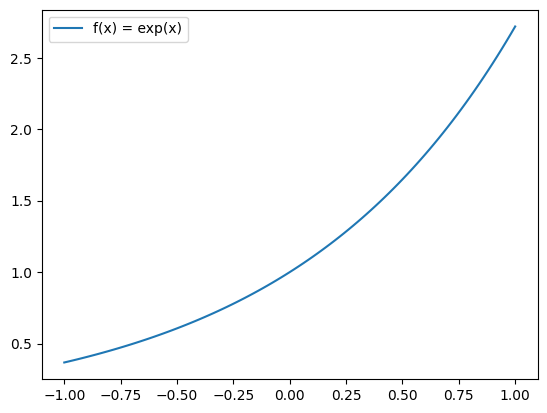

In [2]:
def f(x):
    return np.exp(x).astype(np.float64)

a,b = -1,1

N = 101

x = np.linspace(a,b,N)

y = f(x)

plt.plot(x,y)
plt.legend(['f(x) = exp(x)'])



# 数值积分
## 概述
数值积分是数值分析领域的一个重要部分，它旨在近似计算函数在特定区间上的定积分。当被积函数没有显式积分形式或难以求解时，数值积分方法显得尤为重要。这些方法通过将积分区间分割成多个小区间，然后对每个小区间上的函数值进行某种形式的近似求和，从而得到整个区间上积分的近似值。

## 基本原理
对于某一个被积函数$f(x)$而言,其在区间$[a,b]$上的数值积分的的原理为:
$$
\int_{a}^{b} f(x)dx = \sum_{i=1}^{n} A_i f(x_i)
$$,
即将$f(x)$转换为某些个求积节点$\{x_1,\cdots,x_n\}$上的加权和,其中$A_i$为每个$x_i$的求积权重,仅与求积节点的选取相关.

## 常用方法
1. 中点矩形法（Midpoint Rule）
原理：在每个小区间中取中点的函数值作为该区间的代表值。
公式：$$ \int_{a}^{b} f(x)dx \approx \Delta x \sum_{i=1}^{n} f\left(\frac{x_{i-1}+x_i}{2}\right) $$
优点：通常比左右矩形法更准确。
2. 梯形法则（Trapezoidal Rule）
原理：假设函数在每个小区间内线性变化，即用梯形的面积来近似区间下的面积。
公式：$$ \int_{a}^{b} f(x)dx \approx \frac{\Delta x}{2} \sum_{i=1}^{n} [f(x_{i-1}) + f(x_{i})] $$
优点：综合了左右端点信息，精度优于单一矩形法。
3. 辛普森法则（Simpson's Rule）
原理：适用于偶数个小区间的情况，假设函数在每个小区间内可由二次多项式近似。
公式：$$ \int_{a}^{b} f(x)dx \approx \frac{\Delta x}{3} \sum_{i=1}^{n/2} [f(x_{2i-2}) + 4f(x_{2i-1}) + f(x_{2i})] $$
优点：对于平滑函数，其精度高于梯形法则和矩形法则。

## 高级方法与误差估计
* 自适应方法：如自适应辛普森法则或自适应梯形法则，根据误差估计动态调整小区间的大小，以提高积分精度。
* 高阶复合规则：通过在每个小区间内应用更高阶的近似方法（如三阶、四阶辛普森法则）来提高精度。
* 误差估计：通常基于函数的导数或差商来评估近似积分的误差，并据此调整积分策略。

# 代数精度（Algebraic Accuracy）

## 概念解析
代数精度（Algebraic Accuracy）是衡量数值积分方法精确度的一个重要概念，特别是在讨论Newton-Cotes公式和其他插值型积分方法时。它描述了当被积函数是多项式时，数值积分方法能够精确积分的最高次多项式的阶数。换句话说，如果一个数值积分方法对所有低于某特定阶数的多项式都能给出完全准确的结果，那么我们就说这个方法具有该阶的代数精度。

## 重要性
理论基础：代数精度提供了理论上的保证，帮助我们理解不同数值积分方法的性能和局限性。
方法比较：通过比较不同方法的代数精度，可以直观地看出哪种方法在理论上更适用于特定类型的函数。
误差分析：在实际应用中，虽然被积函数往往不是多项式，但其代数精度仍能作为评估积分误差的一个基准。

## 如何确定代数精度
我们定义代数精度:如果某个求积公式对于次数不超过m的多项式均成立,那么我们称这个求积公式具有m阶的代数精度。 
转化为数学语言:
$$
\begin{aligned}
\left\{
     \begin{array}{lcl}
     \sum\limits_{i=1}^{n} A_i = b-a ,\\
     \sum\limits_{i=1}^{n} A_i x_i = \frac{1}{2} \sum\limits_{i=1}^{n}(b^2 - a^2) ,\\
     \sum\limits_{i=1}^{n} A_i x_i^2 = \frac{1}{3} \sum\limits_{i=1}^{n}(b^3 - a^3) ,\\
      \vdots \\
     \sum\limits_{i=1}^{n} A_i x_i^m = \frac{1}{m+1} \sum\limits_{i=1}^{n}(b^{m+1} - a^{m+1}).
     \end{array}
\right.

\end{aligned}
$$


## 常见例子
* 梯形法则：使用两个节点（区间的两端），构建的是一条直线（一次多项式），因此其代数精度为1。
* 辛普森法则（1/3法则）：使用三个节点（区间的两端及中点），可以完美积分二次多项式，故代数精度为2。
* 辛普森3/8法则：使用四个节点，能够精确积分三次多项式，代数精度为3。
* Boole法则：使用五个节点，代数精度为4。

# Newton-Cotes 求积公式

## 原理简介
Newton-Cotes 求积公式是一系列数值积分方法的总称，它基于拉格朗日插值多项式来近似被积函数，并通过对这个多项式在积分区间上的积分来估算原函数的真实积分值。这种方法的关键将积分区间$[a,b]$均分为$n$份,每一份的长度$h = \frac{b-a}{n}$,选取等距节点$x_k = a + th,t = 0,1, ... ,n$构造出的插值型求积公式称为Newton-Cotes公式.
$$
I_n = (b-a)\sum_{k = 0}^{n}C_k^{(n)}f(x_k)
$$
## 步骤概述
1. 区间划分：

    将积分区间 [a, b] 均匀划分为 n 个小区间，每个小区间的长度为 $\Delta x = \frac{b-a}{n}$。
计算每个小区间的端点或中点（取决于所采用的规则），记为 $x_0, x_1, ..., x_n$。

2. 构造插值多项式：

    对于每个小区间，利用该区间内的 n+1 个等分点（包括端点）构造一个 n 阶的拉格朗日插值多项式 $P_n(x)$，该多项式通过这些点。

3. 积分多项式：

    对构造的多项式 $P_n(x)$ 在每个小区间上进行积分，得到该区间上的近似积分值。

4. 求和：

    将所有小区间上的积分值相加，得到整个区间 [a, b] 上的积分近似值。

5. Cotes系数：

    对于不同阶数的 Newton-Cotes 公式，存在对应的权重系数（即 Cotes 系数），这些系数用来乘以各小区间上的函数值，以计算总积分。例如，梯形法则的系数为 1 和 1，辛普森法则的系数为 1, 4, 和 1。
    `Cotes系数`,其取值如下:
$$
C_k^{(n)} = \frac{h}{b-a}\int_0^n\prod_{j = 0 , k \neq j}^{n}\frac{t-j}{k-j}dt = \frac{(-1)^{n-k}}{nk!(n-k)!}\int_0^n\prod_{j = 0 , k \neq j}^{n}(t-j)dt
$$

6. 误差分析：

    考虑到插值误差和数值稳定性，高阶 Newton-Cotes 公式可能在某些情况下表现不佳，尤其是在小区间数量较大或被积函数有剧烈变化时。因此，通常需要进行误差分析并可能选择自适应方法来优化积分精度。

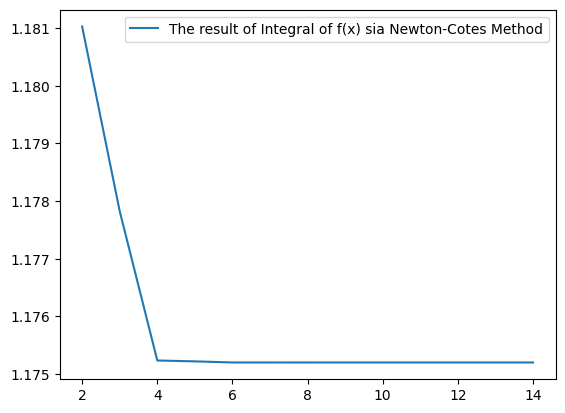

In [3]:
def newton_cotes(f, a, b, n=5):
    """
    使用牛顿-科特斯公式进行数值积分。

    参数:
    f -- 待积分的函数
    a -- 积分下限
    b -- 积分上限
    n -- 积分公式中的节点数(默认为5)

    返回:
    积分的近似值
    """
    x = np.linspace(a, b, n + 1)

    def get_cotes_params(k, n):
        """
        计算牛顿-科特斯公式的系数。

        参数:
        k -- 系数的索引
        n -- 积分公式中的节点数

        返回:
        系数的值
        """
        
        def get_polyminal(t):
            """
            计算多项式。

            参数:
            t -- 多项式的变量

            返回:
            多项式的值
            """
            res = 1
            for i in range(n + 1):
                if i != k:
                    res *= (t - i)
            return res

        res = (-1)**(n-k) * scipy.integrate.quad(get_polyminal, 0, n)[0] / (n * math.factorial(k) * math.factorial(n-k))

        return res

    cotes = [get_cotes_params(k, n) for k in range(n + 1)]
    res = sum(cotes[k] * f(x[k]) for k in range(n + 1))
    
    ##print(f"积分函数:{f.__name__},积分区间:[{a},{b}],阶数:{n},积分值:{res}")

    return res

# 测试不同节点数下牛顿-科特斯公式的积分效果
n = [i for i in range(2, 15)]
y_NC = [newton_cotes(f, a, b, i) for i in n]

# 绘制积分结果随节点数变化的图形
plt.plot(n, y_NC)
plt.legend(["The result of Integral of f(x) sia Newton-Cotes Method"])

而通过稳定性分析得知:  
在n>=8时,Newton-Cotes方法的稳定性变得很差,出于稳定性考虑,我们选择使用划分区间分段求解的方法,即所谓的复合求积法

而我们容易发现,当我们需要更高的精度时,复合积分法可以做到的但是会显得很"吃力",例如:  
复合梯形法的误差限估计大致为:$O(h^2)$,这意味着如果$\epsilon=10^{-6}$时,$h = 10^{-3}$,我们需要对区间做约10次二分才能做到这一点。  
而复合 Simpson 积分法误差限估计为:$O(h^4)$，这意味着如果$\epsilon=10^{-6}$时,$h = 10^{-4}$,我们需要对区间做约5次二分才能做到这一点.  
但是如果想要达到谱精度,在区间长度有限的情况下显然计算量较大.  
在这种背景下,我们介绍Richard外推加速法:
### Definition:
我们定义如果对区间做一次二分称为计算加速一次  
我们有:
$$
T_m^{(k)} = \frac{4^m}{4^m - 1}T_{m-1}^{(k+1)} - \frac{1}{4^m - 1}T_{m-1}^{(k)} \\


T_m(h) = \frac{4^m}{4^m - 1}T_{m-1}(\frac{h}{2}) - \frac{1}{4^m - 1}T_{m-1}(h)
$$

In [4]:
class IntegralOfSteven:
    
    """
    Steven的积分类
    """
    
    def __init__(self,f,a,b,n):
        self.func = f
        self.a = a
        self.b = b
        self.n = n
        
    def compositeTrapzoid(self):
        """
        复合梯形法
        """
        h = (self.b - self.a) / self.n
        sum = 0
        for i in range(self.n):
            sum += self.func(self.a + i * h) + self.func(self.a + (i + 1) * h)
        return h / 2 * sum
    
    
    def compositeSimpson(self):
        """
        复合 Simpson 法
        """
        h = (self.b - self.a) / self.n
        sum = 0
        for i in range(self.n):
            sum += self.func(self.a + i * h) + 4 * self.func(self.a + (i + 1/2) * h) + self.func(self.a + (i + 1) * h)
        return h / 6 * sum
    
    
    def romberg(self, epsilon=1e-10, output_key=False):
        """
        使用Romberg方法计算定积分。
        
        参数:
        epsilon -- 计算精度，用于判断迭代是否结束。
        output_key -- 是否输出迭代次数和积分结果。
        
        返回:
        定积分的近似值。
        """

        # 初始化迭代次数和初始步长
        k = 0
        n = self.n
        h = (self.b - self.a) / n
        
        # 初始化Romberg矩阵
        R = list()
        R.append([sum([h * self.func(self.a + i * h) for i in range(n + 1)])])
        
        while True:
            k += 1
            
            # 用于存储当前迭代级别上的所有T_jk值
            k_array = list()
            
            for j in range(k + 1):
                
                # 当j为0时，计算T_0k
                if j == 0:
                    t = 0
                    for i in range(1, n + 1, 2):
                        t += self.func(self.a + i * h) * h
                    T_jk = R[k - 1][0] / 2 + t
                    n, h = n * 2, h / 2
                    k_array.append(T_jk)
                
                # 当j不为0时，使用递推关系计算T_jk
                else:
                    T_jk = 4 ** k * k_array[-1] / (4 ** k - 1) - R[k - 1][-1] / (4 ** k - 1)
                    k_array.append(T_jk)
            
            R.append(k_array)
            
            # 判断迭代是否结束
            if k == 15 or abs(R[k][-1] - R[k - 1][-1]) < epsilon:
                break
        
        # 根据需要输出迭代次数和积分结果
        if output_key:
            print(f"迭代次数为:{k},函数积分值为:{R[k][-1]}")
        
        # 返回最终的积分近似值
        return R[k][-1]
    
    
    def adaptivesIntegral(self,epsilon = 1e-8):
        """
        自适应梯形积分法
        """
        
        a = self.a
        b = self.b
        f = self.func
        
        # 计算初始粗略估计的积分值
        h = (b - a) / 2
        c = (a + b) / 2
        fa = f(a)
        fc = f(c)
        fb = f(b)
        integral_approximation = h / 3 * (fa + 4 * fc + fb)

        # 计算更精细估计的积分值
        def recursive_simpson(f, a, b, epsilon, whole_approximation):
            h = (b - a) / 2
            c = (a + b) / 2
            d = (a + c) / 2
            e = (c + b) / 2
            fd = f(d)
            fe = f(e)
            left_approximation = h / 6 * (fa + 4 * fd + fc)
            right_approximation = h / 6 * (fc + 4 * fe + fb)
            split_approximation = left_approximation + right_approximation

            if abs(split_approximation - whole_approximation) <= 15 * epsilon:
                ##这里取15倍误差是有原因的,详细可以参见论文证明
                
                return split_approximation + (split_approximation - whole_approximation) / 15

            return recursive_simpson(f, a, c, epsilon / 2, left_approximation) + recursive_simpson(f, c, b, epsilon / 2, right_approximation)

        return recursive_simpson(f, a, b, epsilon, integral_approximation)
    
    def gauss_Algo_Integral(self,point_num = 2,output_key = False,param_out_key = False):
        """_summary_

        Args:
            deg (int, optional): _description_. Defaults to 3.
            output_key (bool, optional): _description_. Defaults to False.
            param_out_key (bool, optional): _description_. Defaults to False.
        """
        
        params = syp.symbols(f"a:{point_num}")
        
        x = syp.symbols("x")
        
        omega = syp.symbols("0")
        
        for i in range(point_num):
            omega += params[i] * syp.Pow(x,i)
        
        omega += syp.Pow(x,point_num)
        
        pass
        
        
    
    def gauss_Legendre_Integral(self,deg = 3,output_key = False,param_out_key = False):
        """
        高斯积分法
        
        因为不得不用到多项式积分逻辑计算的内容,因此我们引入了符号计算库sympy来辅助我们计算积分
        """
        
        x = syp.symbols("x")
        
        def f(x):
            return syp.exp(x)
        
        #legendre多项式
        def L(deg):
            df = syp.diff((x**2 - 1) ** (deg+1),x,deg+1)
            L = (1 / 2**(deg+1)) / syp.factorial(deg+1) * df
            
            return L
        
        #高斯点获取
        def getGaussPoint(deg):
            x_k = syp.solve(L(deg))
            return x_k
        
        #计算求积系数A_k
        def getQuadratureCoefficient(x_klist,deg):
            Alist = []
            for x_k in x_klist:
                k = syp.diff(L(deg),x,1)
                A = 2/((1-x_k**2)*(k.subs(x,x_k))*k.subs(x,x_k))
                ## Obeject(sympy).subs(x,y)表示将这个sympy物体中的"x"替换为另一个符号变量或者值
                Alist.append(A)
            return Alist
        
        
        res = 0
        x_klist = getGaussPoint(deg)
        
        Alist = getQuadratureCoefficient(x_klist,deg)
        
        length = len(Alist)
        
        if a == 1 and b == 1:
            for i in range(length):
                res += (Alist[i] * f(x_klist[i])).evalf()
                
            
        else:
            for i in range(length):
                x = (b-a)/2 * x_klist[i] + (b+a)/2
                res += (b-a)/2 * (Alist[i] * f(x)).evalf()
                
        
        
        if output_key:
            print(f"函数积分值为:{res}")
            
        if param_out_key:
            return [res,x_klist,Alist]
            
        return res
            
        
            
        

In [5]:
inte = IntegralOfSteven(f,a,b,100)

y_CT = inte.compositeTrapzoid()
y_CS = inte.compositeSimpson()
y_RB = inte.romberg()
y_GL = inte.gauss_Legendre_Integral()
y_CT,y_CS,y_RB,y_GL

(2.3504807335115387, 2.3504023874181783, 2.35040332193691, 2.35040209215638)

ex1:  
考察积分
$$
\int_0^1 \sqrt{x}f(x) dx,\int_0^1 \frac{f(x)}{\sqrt{x}}dx
$$
试建立2点,4点Gauss公式

In [6]:
def f(x):
    return x

ex_1 = IntegralOfSteven(f,0,1,100)

paramOfTwoPoints = ex_1.gauss_Legendre_Integral(1,output_key=True,param_out_key=True)
paramOfFourPoints = ex_1.gauss_Legendre_Integral(3,output_key=True,param_out_key=True)

print(paramOfTwoPoints)
print(paramOfFourPoints)

函数积分值为:2.34269608790973
函数积分值为:2.35040209215638
[2.34269608790973, [-0.577350269189626, 0.577350269189626], [1.00000000000000, 1.00000000000000]]
[2.35040209215638, [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053], [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]


ex2:  
取n = 8,16;用复合梯形公式,simpson公式,Romberg积分计算
$$
\int_{0.5}^5\frac{\sin{x}}{x}dx
$$


Trapzoid: 1.0568664460911164
Simpson: 1.0568238265649492
Romberg: 1.05682408659939


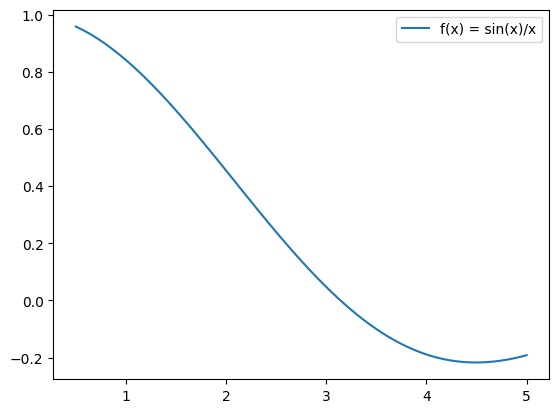

In [7]:
def ex_2(x):
    return np.sin(x) / x


resOfEx_2 = IntegralOfSteven(ex_2,0.5,5,101)

x = np.linspace(0.5,5,101)

y = ex_2(x)

plt.plot(x,y)
plt.legend(["f(x) = sin(x)/x"])


Trap = resOfEx_2.compositeTrapzoid()
Simp = resOfEx_2.compositeSimpson()
Romb = resOfEx_2.romberg()
print("Trapzoid:",Trap)
print("Simpson:",Simp)
print("Romberg:",Romb)

ex3:  
利用Romberg积分公式和自适应积分公式计算积分
$$
\int_{0.5}^5\frac{100}{x^2}\sin{\frac{10}{x}}dx
$$
可选择自适应Simpson,自适应中点公式,或者自适应两点Gauss公式

迭代次数为:15,函数积分值为:-8.242237103561967
-8.242237103561967


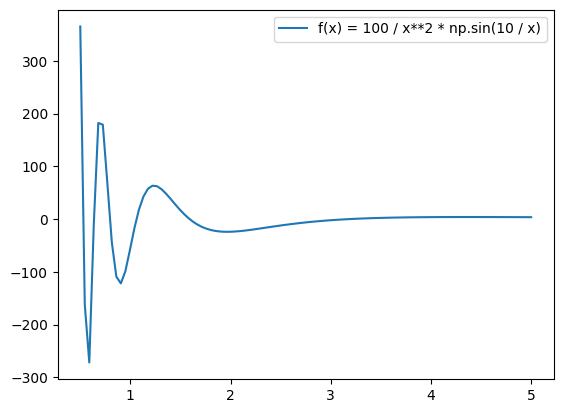

In [8]:
def ex_3(x):
    return 100 / x**2 * np.sin(10 / x)

resOfEx_3 = IntegralOfSteven(ex_3,0.5,5,101)

x = np.linspace(0.5,5,101)
y = ex_3(x)

plt.plot(x,y)
plt.legend(["f(x) = 100 / x**2 * np.sin(10 / x)"])

romberg = resOfEx_3.romberg(output_key=True)

print(romberg)